# 항공사 지연 요인 분석 보고서

##  프로젝트 개요
- **분석 목적**: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- **데이터 출처**: 항공 운항 지연률 데이터 (총 33,468건)
- **분석 대상 변수**:  
  - `pct_carrier_delay`: 운항사 요인
  - `pct_atc_delay`: 관제 요인
  - `pct_weather_delay`: 기상 요인
  - `airline`: 항공사명

In [36]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1:
        print(i.name)

Gulim
New Gulim


## 1. 변수 탐색

In [2]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("data/airline_stats.csv")

# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


데이터 정보를 보면 'airline'은 결측값이 없고, 수치형 변수들은 결측치가 28개씩 존재함을 알 수 있다.
- 범주형 변수 : airline <br>
- 수치형 변수 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [3]:
# 데이터 샘플 보기
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [37]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


- 날씨 지연이 항공사 지연과 관제 지연에 비해 전체적으로 비율이 낮게 나타난다. <br>
- 평균은 항공사 지연이 가장 높지만 표준편차는 관제 지연이 더 높게 나타난다.

In [40]:
#범주형 변수의 값 목록
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

- 총 6개의 항공사 데이터를 포함하고 있다. <br>
- 그 중 Delta 항공사가 9107건으로 가장 많고, American, Southwest, United 항공사가 5천건 수준이다.

### 항공사별 기술통계 비교

In [41]:
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


<항공사 요인의 경우> <br>
- 평균(mean)은 "American"이 가장 높고 "Alaska"가 가장 낮다.
- 표준편차(std)는 "United"가 가장 높고 "Alaska"가 가장 낮다.
- 전반적으로 기술통계 결과 "Alaska" 항공사가 다른 항공사들에 비해 대부분 낮게 측정된다.

In [42]:
df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


<관제 요인의 경우>
- 평균(mean)은 "Jet Blue"가 가장 높고 "Southwest"가 가장 낮다.
- 표준편차(std)는 "Alaska"가 가장 높고 "Southwest"가 가장 낮다.
- 전반적으로 기술통계 결과 "Southwest"항공사가 다른 항공사들에 비해 대부분 낮게 측정된다.

In [43]:
df.groupby('airline')['pct_weather_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,0.513497,1.122920,0.680765,0.465327,0.512611,0.680697
std,1.136494,1.097811,1.093255,0.764147,0.649631,1.338433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296719,0.000000,0.000000,0.105675,0.000000
50%,0.000000,0.884354,0.316406,0.157312,0.305598,0.263780
75%,0.497395,1.641725,0.893346,0.666667,0.663306,0.861395
max,14.633803,12.500000,20.500000,9.923077,6.240987,33.333333


<날씨 요인의 경우>
- 평균(mean)은 "American"이 가장 높고 "Jet Blue"가 가장 낮다.
- 표준편차(std)는 "United"가 가장 높고 "Southwest"가 가장 낮다.
- 전반적으로 기술통계 결과 항공사 요인과 관제 요인에 비해 대부분 낮게 측정된다.

## 2. 데이터 전처리
### 2.1 결측치 탐색
- 결측치가 있는 변수: `pct_carrier_delay`, `pct_atc_delay`, `pct_weather_delay` (각 28건)

### 2.2 결측치 처리
- **방안 A**: 행 제거 (`dropna`)
- **방안 B**: 평균으로 대체 (`fillna`)
- **방안 C**: 항공사별 평균으로 대체 (`groupby().transform()`)

*세 가지 방식의 처리 후 분포 비교 및 통계 요약 포함*


In [6]:
# 결측치 개수
missing_count = df.isnull().sum()

# 전체 대비 결측치 비율(%)
missing_ratio = (missing_count / len(df)) * 100

# 결측치 요약표 출력
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio
}).sort_values(by='Missing Count', ascending=False)

missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
pct_carrier_delay,28,0.083662
pct_atc_delay,28,0.083662
pct_weather_delay,28,0.083662


In [7]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

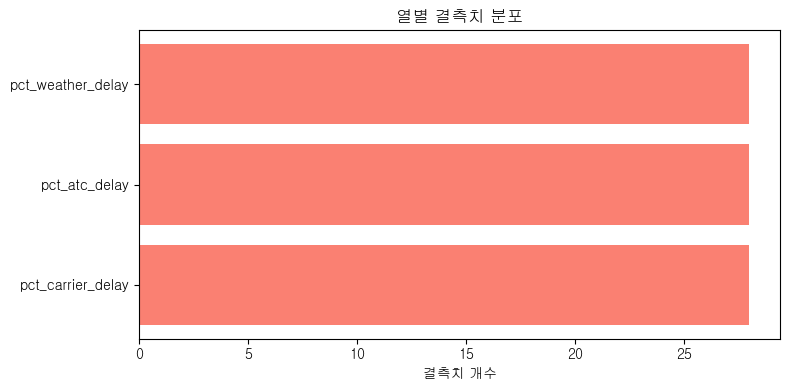

In [8]:
import matplotlib.pyplot as plt

# 결측치 있는 컬럼만 시각화
missing_df = missing_df[missing_df['Missing Count'] > 0]

plt.figure(figsize=(8, 4))
plt.barh(missing_df.index, missing_df['Missing Count'], color='salmon')
plt.xlabel('결측치 개수')
plt.title('열별 결측치 분포')
plt.tight_layout()
plt.show()


In [14]:
# A. 결측값이 있는 행 제거
df_dropna = df.dropna()

# B. 전체 평균으로 결측값 대체
df_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())

# C. 항공사별 평균으로 결측값 대체
df_group_mean = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_group_mean[col] = df_group_mean.groupby('airline')[col]\
                                          .transform(lambda x: x.fillna(x.mean()))



In [15]:
# 수치형 변수만 추출
num_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

# describe 비교
desc_dropna = df_dropna[num_cols].describe().add_prefix('dropna_')
desc_mean = df_filled[num_cols].describe().add_prefix('filled_')
desc_group = df_group_mean[num_cols].describe().add_prefix('group_')

# 세 개 결과를 하나로 합치기
summary_all = pd.concat([desc_dropna, desc_filled, desc_group], axis=1)
import pandas as pd
from IPython.display import display
display(summary_all)


,dropna_pct_carrier_delay,dropna_pct_atc_delay,dropna_pct_weather_delay,mean_pct_carrier_delay,mean_pct_atc_delay,mean_pct_weather_delay,group_pct_carrier_delay,group_pct_atc_delay,group_pct_weather_delay
count,33440.000000,33440.000000,33440.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000
mean,7.041475,5.089962,0.684776,7.041475,5.089962,0.684776,7.041531,5.090018,0.684786
std,4.497596,4.718647,1.073743,4.495714,4.716672,1.073294,4.495773,4.716727,1.073301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000,4.147084,2.148281,0.000000,4.147084,2.148281,0.000000
50%,6.356893,3.900000,0.316002,6.359631,3.903367,0.316655,6.357260,3.903367,0.316655
75%,9.140474,6.630238,0.935161,9.136141,6.625000,0.934579,9.136141,6.626106,0.934579
max,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333


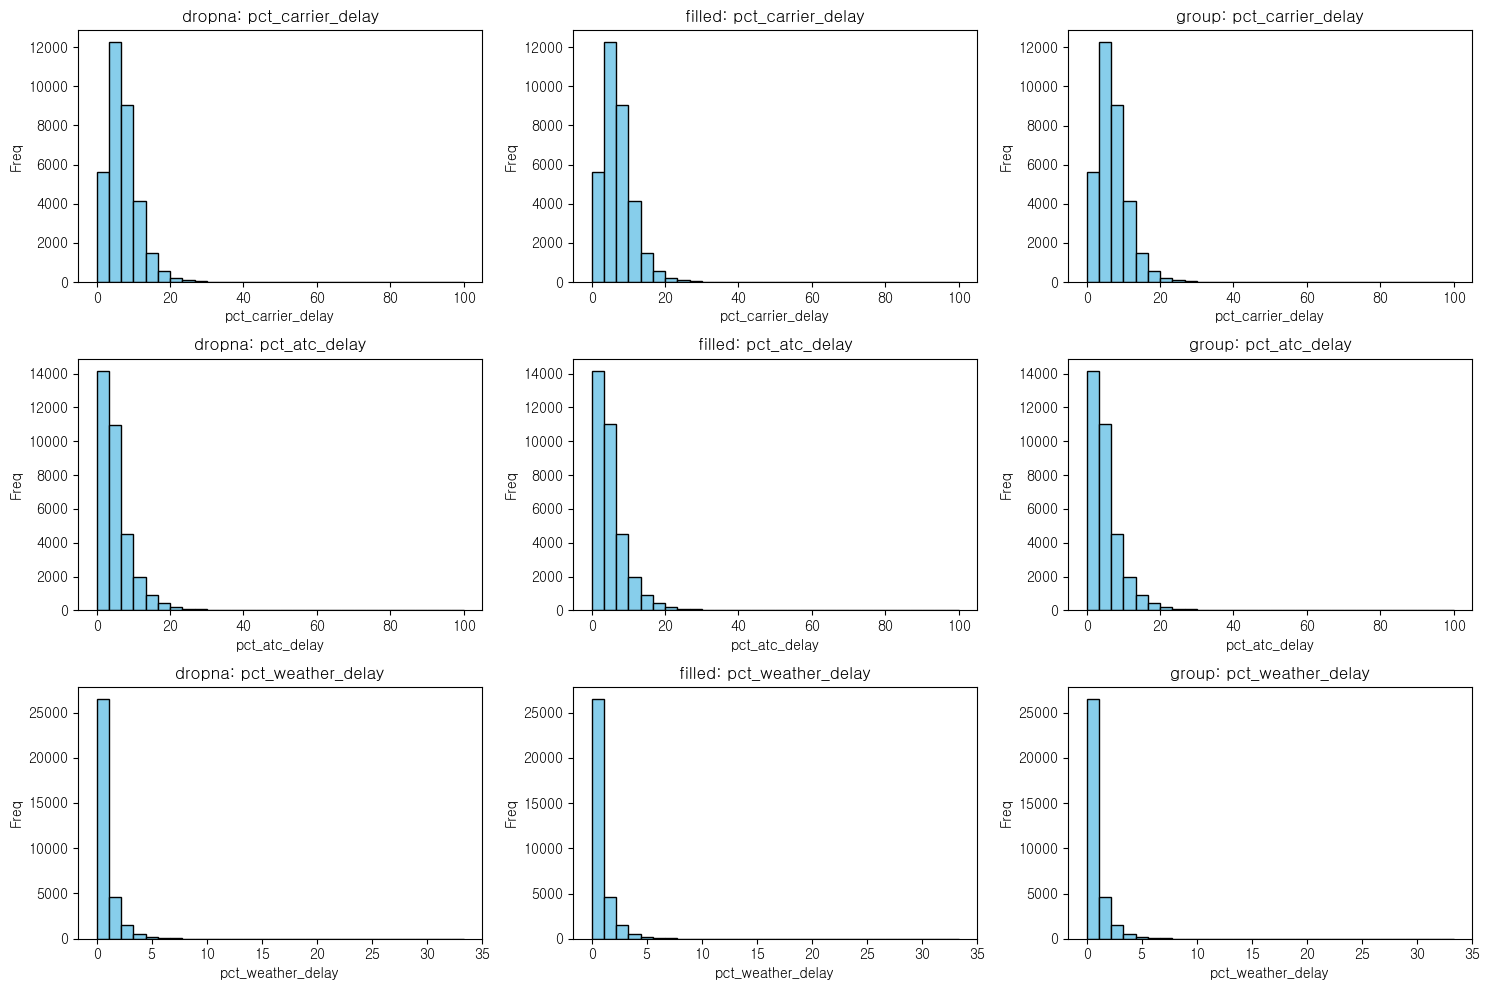

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
datasets = [('dropna', df_dropna), ('filled', df_filled), ('group', df_group_mean)]

for i, col in enumerate(num_cols):
    for j, (label, data) in enumerate(datasets):
        axes[i, j].hist(data[col], bins=30, color='skyblue', edgecolor='black')
        axes[i, j].set_title(f'{label}: {col}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Freq')

plt.tight_layout()
plt.show()


- 평균 대체는 데이터 수를 유지하면서 평균은 같지만 분산이 약간 줄어든다.
- 그룹 평균 대체는 항공사별 특징을 유지하면서 보다 정교한 대체 방식이다.
- dropna는 샘플 수가 줄어들어 외곽값의 영향이 커질 수 있다.

선택된 처리 방식: 항공사별 그룹 평균 대체

결론: 본 분석에서는 항공사별 그룹 평균을 이용한 결측치 보간 방식을 적용하였다. <br>
이는 데이터 손실을 최소화하고 항공사별 지연률 특성을 보존하여, 이후 분석의 정확도를 높일 수 있다.

## 3. 탐색적 데이터 분석 (EDA)
### 3.1 변수별 분포
- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인

### 3.2 항공사별 비교
- 항공사별 평균 지연율 비교 (막대그래프)
- 항공사별 상자그림 비교

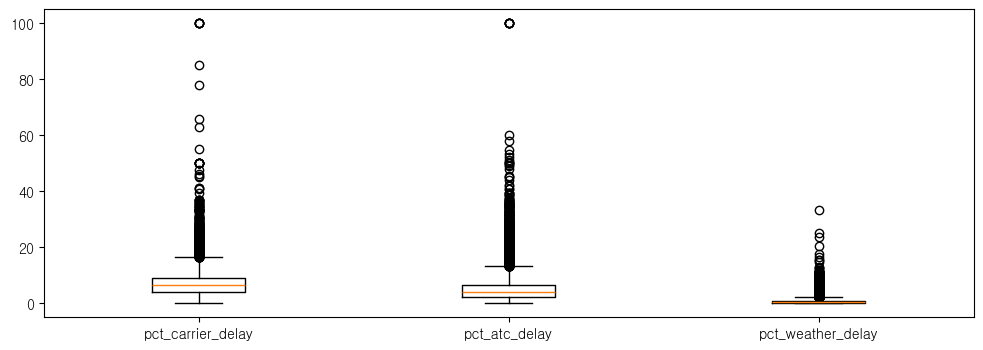

In [19]:
fig = plt.figure(figsize=(12,4))
axes = fig.add_subplot(1,1,1)

axes.boxplot(
             x=[
                 df_dropna['pct_carrier_delay'],
                 df_dropna['pct_atc_delay'],
                 df_dropna['pct_weather_delay']
             ],
             labels=['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'])
plt.show()

<박스플롯 결과 분석> <br>
- 최댓값, 최솟값, 중앙값 모두 pct_carrier_delay > pct_atc_delay > pct_weather_delay 순으로 <br>
항공사 내부로 인한 지연 비율이 관제나 날씨보다 높게 나타난다.  <br>
- 세 지연 모두 이상치가 위에 많이 넓게 분포되어 있으므로 심한 지연이 많았음을 알 수 있다.

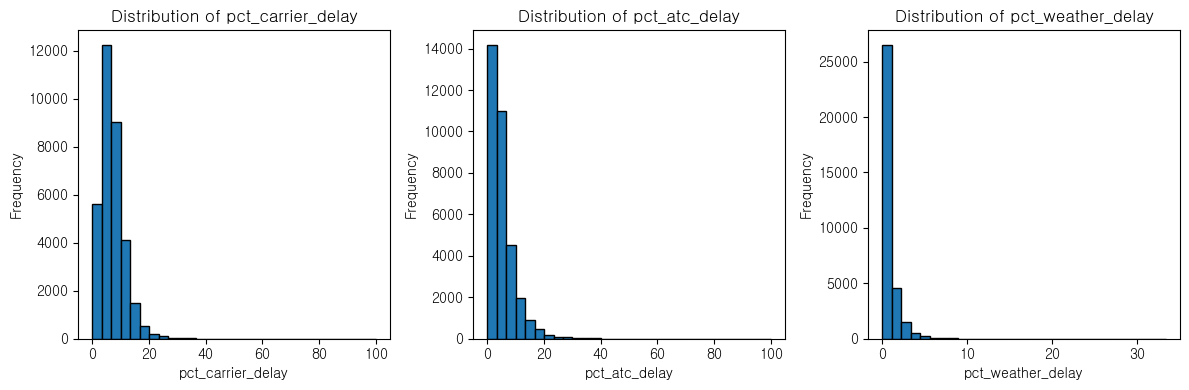

In [20]:
import matplotlib.pyplot as plt

features = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
plt.figure(figsize=(12, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


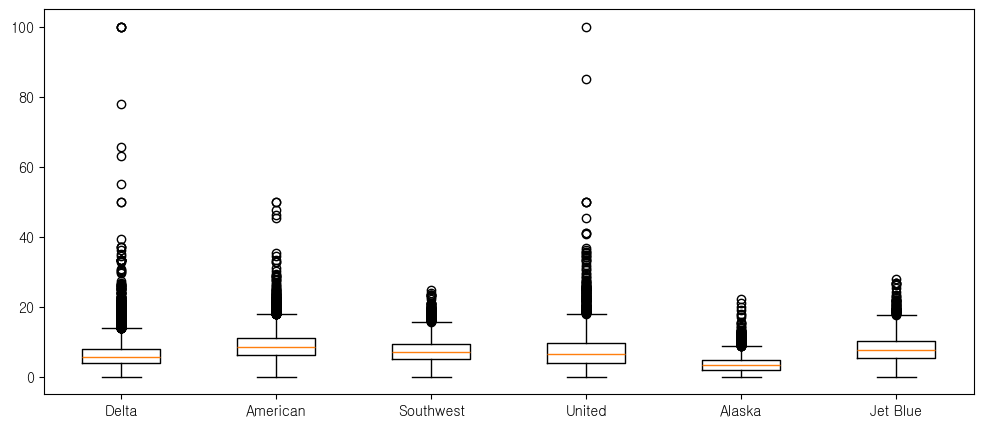

In [22]:
#항공사별 항공사 내부 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(
    x=[
        df_dropna[df_dropna['airline'] == 'Delta']['pct_carrier_delay'],
        df_dropna[df_dropna['airline'] == 'American']['pct_carrier_delay'],
        df_dropna[df_dropna['airline'] == 'Southwest']['pct_carrier_delay'],
        df_dropna[df_dropna['airline'] == 'United']['pct_carrier_delay'],
        df_dropna[df_dropna['airline'] == 'Alaska']['pct_carrier_delay'],
        df_dropna[df_dropna['airline'] == 'Jet Blue']['pct_carrier_delay']
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
- 최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
- 그러나 Delta 항공사와 United 항공사의 이상치가 위에 많이 넓게 분포되어 있으므로 <br>
다른 항공사들에 비해 심한 내부 지연이 있었음을 알 수 있다.

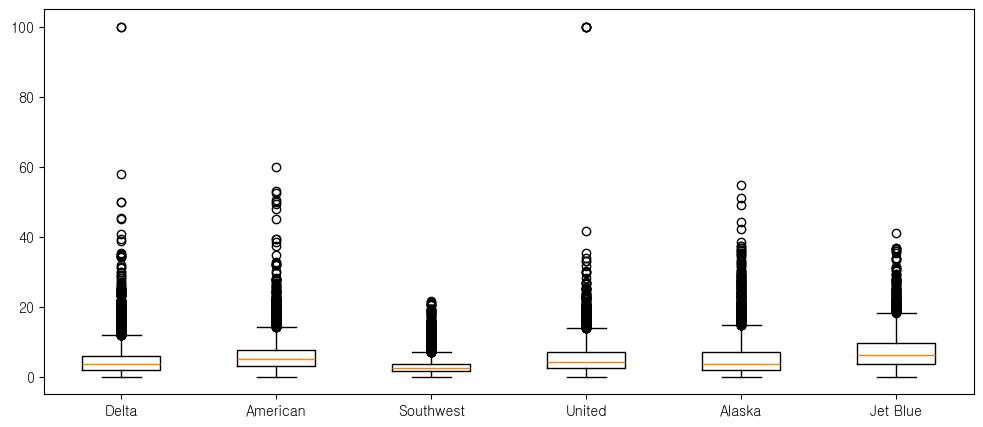

In [23]:
#항공사별 관제 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(
    x=[
        df_dropna[df_dropna['airline'] == 'Delta']['pct_atc_delay'],
        df_dropna[df_dropna['airline'] == 'American']['pct_atc_delay'],
        df_dropna[df_dropna['airline'] == 'Southwest']['pct_atc_delay'],
        df_dropna[df_dropna['airline'] == 'United']['pct_atc_delay'],
        df_dropna[df_dropna['airline'] == 'Alaska']['pct_atc_delay'],
        df_dropna[df_dropna['airline'] == 'Jet Blue']['pct_atc_delay']
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
- 최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
- Delta 항공사와 United 항공사는 항공사 내부 지연과 비슷한 분포를 따라가고 <br>
American 항공사와 Alaska항공사, Jet Blue 항공사는 항공사 내부 지연보다 이상치가 높게 분포되어 있으므로 이 세 항공사는 내부 지연보다 관제로 인한 지연이 더 많음을 예상할 수 있다.

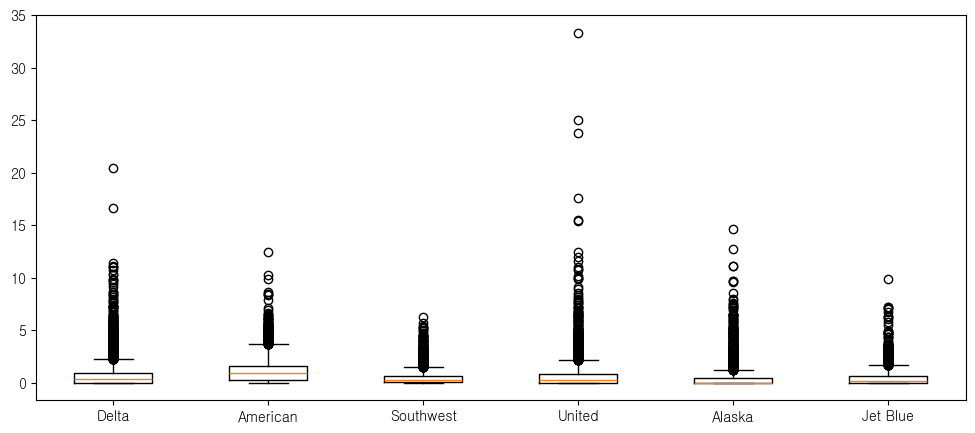

In [24]:
#항공사별 날씨 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(
    x=[
        df_dropna[df_dropna['airline'] == 'Delta']['pct_weather_delay'],
        df_dropna[df_dropna['airline'] == 'American']['pct_weather_delay'],
        df_dropna[df_dropna['airline'] == 'Southwest']['pct_weather_delay'],
        df_dropna[df_dropna['airline'] == 'United']['pct_weather_delay'],
        df_dropna[df_dropna['airline'] == 'Alaska']['pct_weather_delay'],
        df_dropna[df_dropna['airline'] == 'Jet Blue']['pct_weather_delay']
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
- 최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
- 날씨로 인한 지연 최댓값이 약 33%이므로 항공사 내부 지연과 관제 지연보다 지연될 확률이 적음을 알 수 있다.<br>
- IQR 크기가 항공사 내부 지연과 관제 지연에 비해 가장 작으므로 데이터가 변동이 적으므로 안정적이라고 해석할 수 있다.

## 4. 2차원 데이터 분석
### 4.1 공분산 및 상관계수 분석
- 운항사 vs 관제, 기상 요인 간의 연관성 파악

### 4.2 다중공선성 분석
- VIF(Variance Inflation Factor) 계산 및 시각화
- VIF > 10 변수에 대한 해석

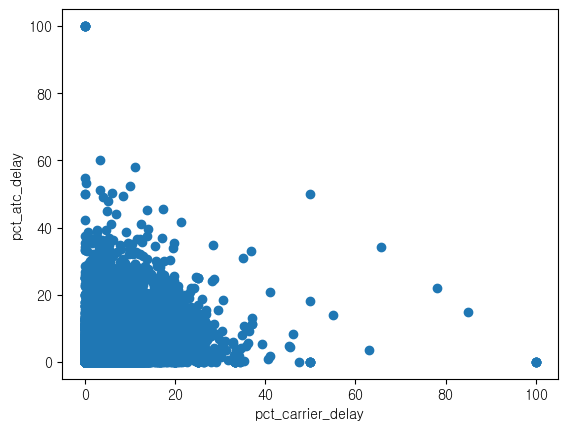

In [39]:
#운항사 vs 관제 Scatter
fig = plt.figure()
axes4 = fig.add_subplot(1,1,1)

axes4.scatter(
    df_filled['pct_carrier_delay'], df_filled['pct_atc_delay']
)
plt.xlabel('pct_carrier_delay')
plt.ylabel('pct_atc_delay')
plt.show()

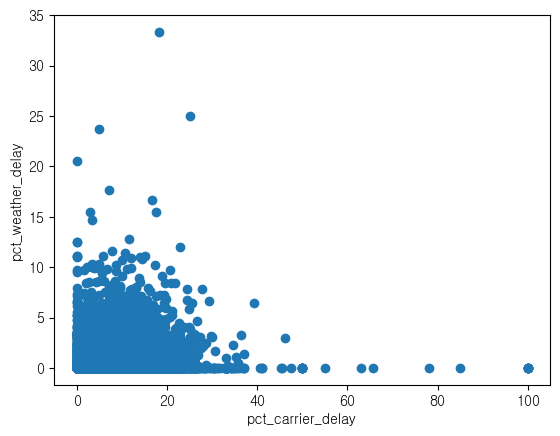

In [29]:
#운항사 vs 날씨 Scatter
fig = plt.figure()
axes5 = fig.add_subplot(1,1,1)

axes5.scatter(
    df_filled['pct_carrier_delay'], df_filled['pct_weather_delay']
)
plt.xlabel('pct_carrier_delay')
plt.ylabel('pct_weather_delay')
plt.show()

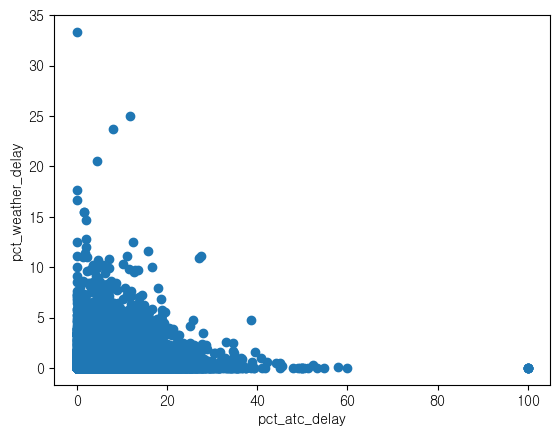

In [30]:
#관제 vs 날씨 Scatter
fig = plt.figure()
axes6 = fig.add_subplot(1,1,1)

axes6.scatter(
    df_filled['pct_atc_delay'], df_filled['pct_weather_delay']
)
plt.xlabel('pct_atc_delay')
plt.ylabel('pct_weather_delay')
plt.show()

<Scatter 결과 분석> <br>
- 세 그림 모두 (0,0)쪽으로 몰려있으므로 모두의 영향을 다 받는 지연은 거의 없는 것으로 예측할 수 있다. <br>
- 상관관계가 없어 보인다.

In [31]:
#상관계수 구하기
corr_matrix = df_filled[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()
print(corr_matrix)

                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.144474           0.161474
pct_atc_delay               0.144474       1.000000           0.091729
pct_weather_delay           0.161474       0.091729           1.000000


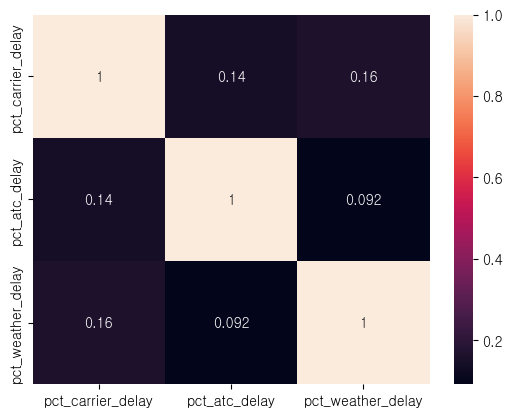

In [32]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

<상관계수 분석>
- corr()함수를 사용하여 상관계수를 구한 결과 세 변수 모두 양의 상관관계이지만 0에 가까우므로 <br>
"상관없음"이라고 판단할 수 있다.
- 상관계수를 히트맵으로도 본 결과 각 변수들 간의 색상이 매우 어두으므로 각 변수들 간 "상관없음"이라고 판단할 수 있다.

In [ ]:
#VIF

## 5. 인사이트 도출
- 운항사 지연률이 높은 항공사는 누구인가?
- 항공사별로 어떤 지연 요인이 더 영향을 미치는가?
- 정책적 개선안 제시

In [33]:
#항공사별 평균 내부 지연률 구하기
carrier_delay_airline = df_filled.groupby('airline')['pct_carrier_delay'].mean()
#항공사별 평균 관제 지연률 구하기
atc_delay_airline = df_filled.groupby('airline')['pct_atc_delay'].mean()
#항공사별 평균 날씨 지연률 구하기
weather_delay_airline = df_filled.groupby('airline')['pct_weather_delay'].mean()

#항공사별 평균 지연률을 하나의 데이터 프레임으로 합치기
delay_df = pd.DataFrame({
    'carrier_delay': carrier_delay_airline,
    'atc_delay': atc_delay_airline,
    'weather_delay': weather_delay_airline
})

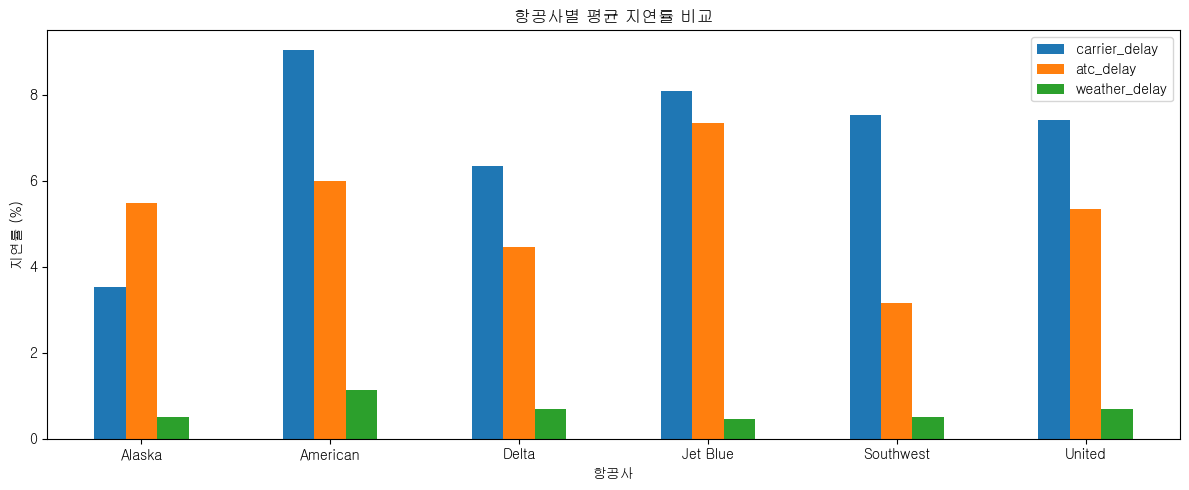

In [34]:
delay_df.plot(kind='bar', figsize=(12,5))
plt.title('항공사별 평균 지연률 비교')
plt.xlabel('항공사')
plt.ylabel('지연률 (%)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

<항공사별 평균 지연률 비교>
- 'Alask'를 제외한 모든 항공사의 평균 지연률은 carrier > atc > weather 순이고, <br> 
'Alask' 항공사는 atc > carrier > weather로 유일하게 항공사 내부 지연률보다 관제 지연률이 더 많다.
- 평균적으로 항공사 내부 지연률이 가장 높은 곳은 'American', 관제 지연률이 가장 높은 곳은 'Jet Blue', 날씨 지연률이 가장 높은 곳은 'American'이다.
- 날씨 지연률은 다른 지연률보다 현저히 적게 나타난다.
- 해당 막대그래프로 항공사별로 어떤 지연 요인이 가장 많거나 적게 영향을 미치는지 파악할 수 있다.

## 6. 결론 및 제언
- 핵심 요약: 데이터 기반 의사결정 가능
- 데이터 활용 방안 및 후속 분석 방향

## 첨부자료
- 사용한 코드 블록
- 데이터 요약 통계표 (`describe()` 결과)
- 참고 문헌 및 출처